In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiac-arrest-dataset/cardiac arrest dataset.csv


In [ ]:
# Data Preprocessing:

# How would you handle missing values in this dataset, and what impact could your choice have on the analysis?
# Can you detect and remove duplicate rows? Why might duplicates be present?
# Exploratory Data Analysis (EDA):

# Generate insights from the top three features impacting the target variable. What do they reveal?
# Visualize and interpret the distribution of a numerical feature. Are there any anomalies or trends?
# Feature Engineering:

# Create a new feature to capture interactions between [Feature A] and [Feature B]. How does this impact model performance?
# How would you encode categorical variables that have many unique categories?
# Data Transformation:

# Discuss the advantages and disadvantages of normalizing vs. standardizing features in this dataset.
# Apply dimensionality reduction. How does it affect your model’s performance?
# Model Evaluation:

# Select an appropriate metric to evaluate a classification model on this dataset. Justify your choice.
# How would you perform hyperparameter tuning for a model built on this dataset?
# Advanced Analysis:

# Perform a time series decomposition on your dataset. What components do you observe?
# Detect multicollinearity among features. How does it affect your model?
# Efficiency and Optimization:

# Optimize a computation-heavy function in your data analysis pipeline. What techniques did you use?
# Parallelize a data processing task across multiple CPUs. What library or method did you employ?

In [30]:
df = pd.read_csv('/kaggle/input/cardiac-arrest-dataset/cardiac arrest dataset.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Removing any columns with too many nulls

In [45]:
df.isnull().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [46]:
null_percentages = df.isnull().mean() * 100

# Create a summary DataFrame
null_summary = pd.DataFrame({
    'Column': null_percentages.index,
    'Null Percentage': null_percentages.values
})

In [8]:
df.fillna(df.median())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## More EDA

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

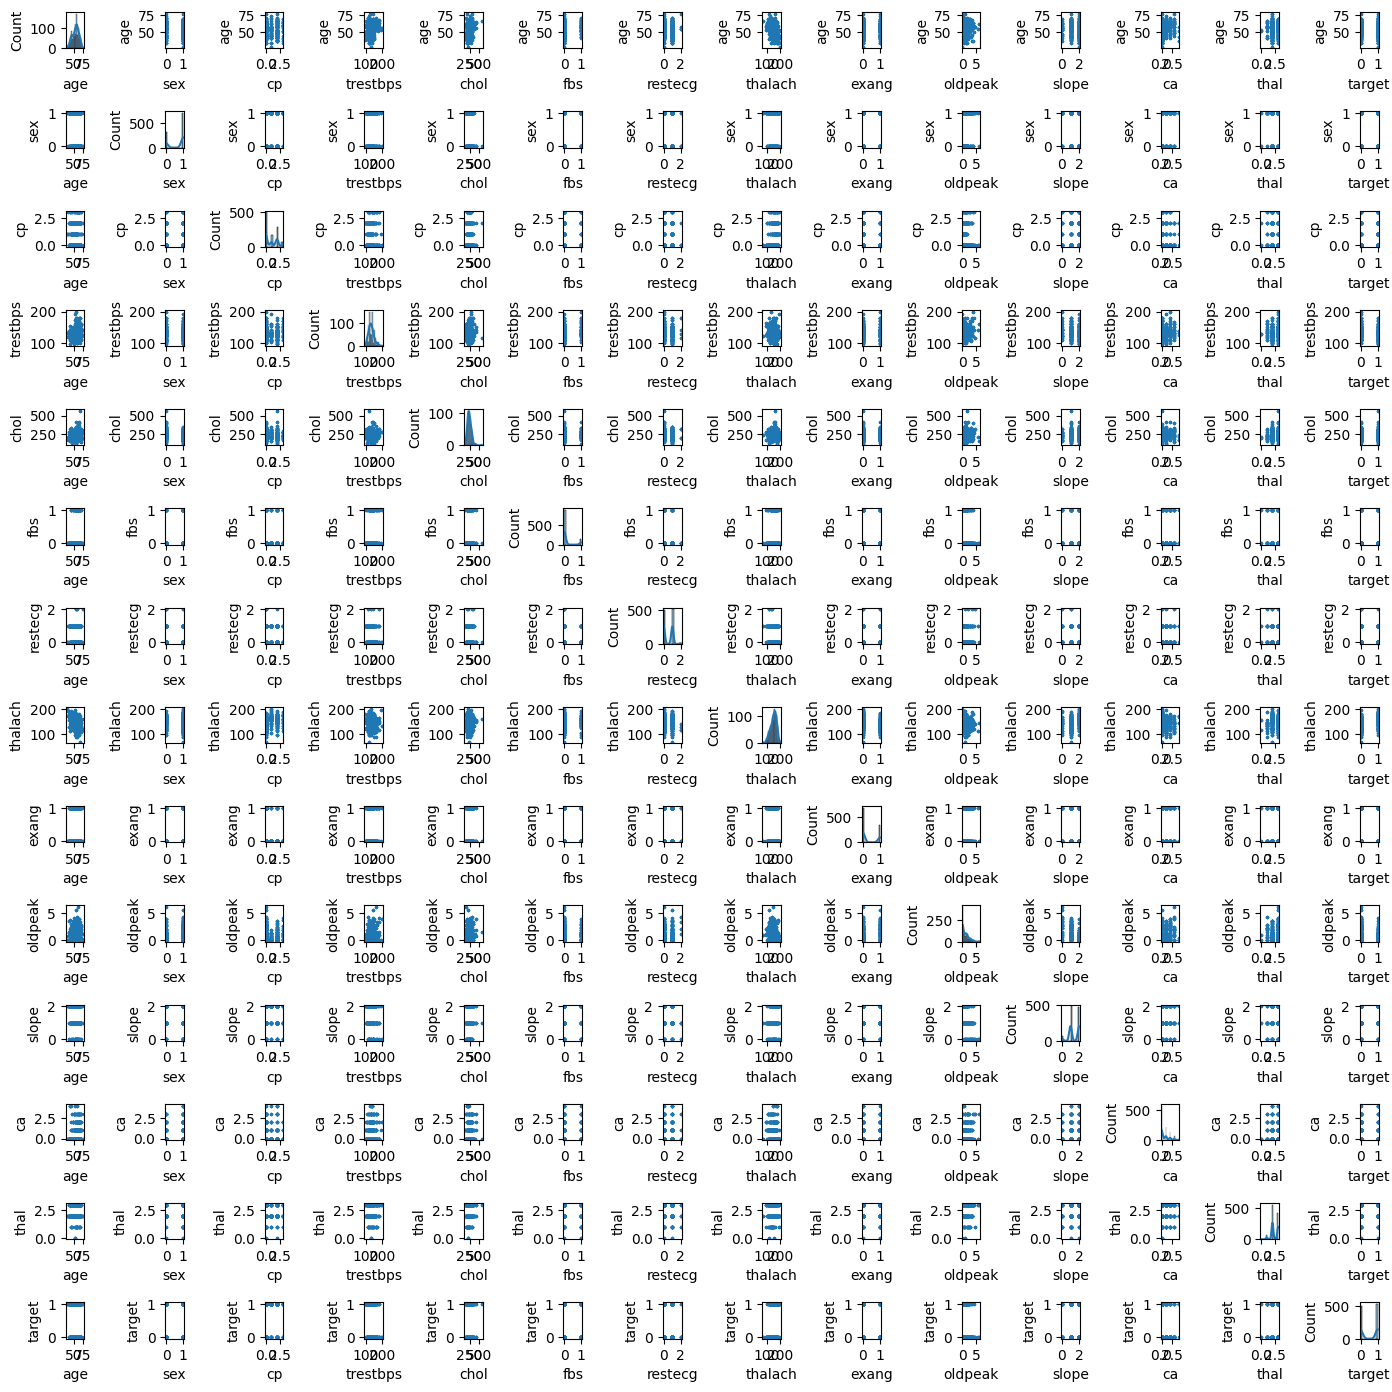

In [33]:
fig, axes = plt.subplots(len(df.columns), len(df.columns), figsize=(14,14))

for i, feat1 in enumerate(df.columns):
    for j, feat2 in enumerate(df.columns):
        if i != j:
            axes[i, j].scatter(df[feat2], df[feat1], s=2)
            axes[i, j].set_xlabel(feat2)
            axes[i, j].set_ylabel(feat1)
        else:
            sns.histplot(df[feat1], ax=axes[i, j], kde=True)
            axes[i, j].set_xlabel(feat1)

plt.tight_layout()
plt.show()

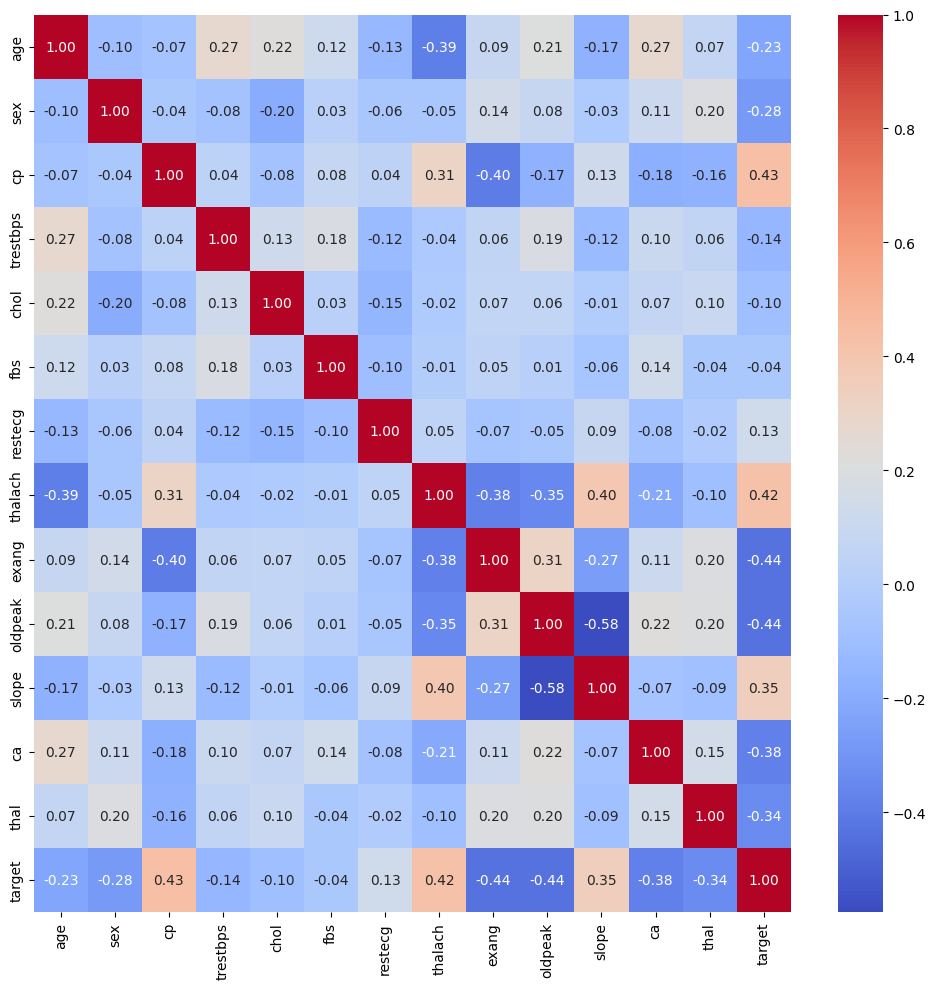

In [36]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.duplicated().sum()

723

In [32]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [33]:
df.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

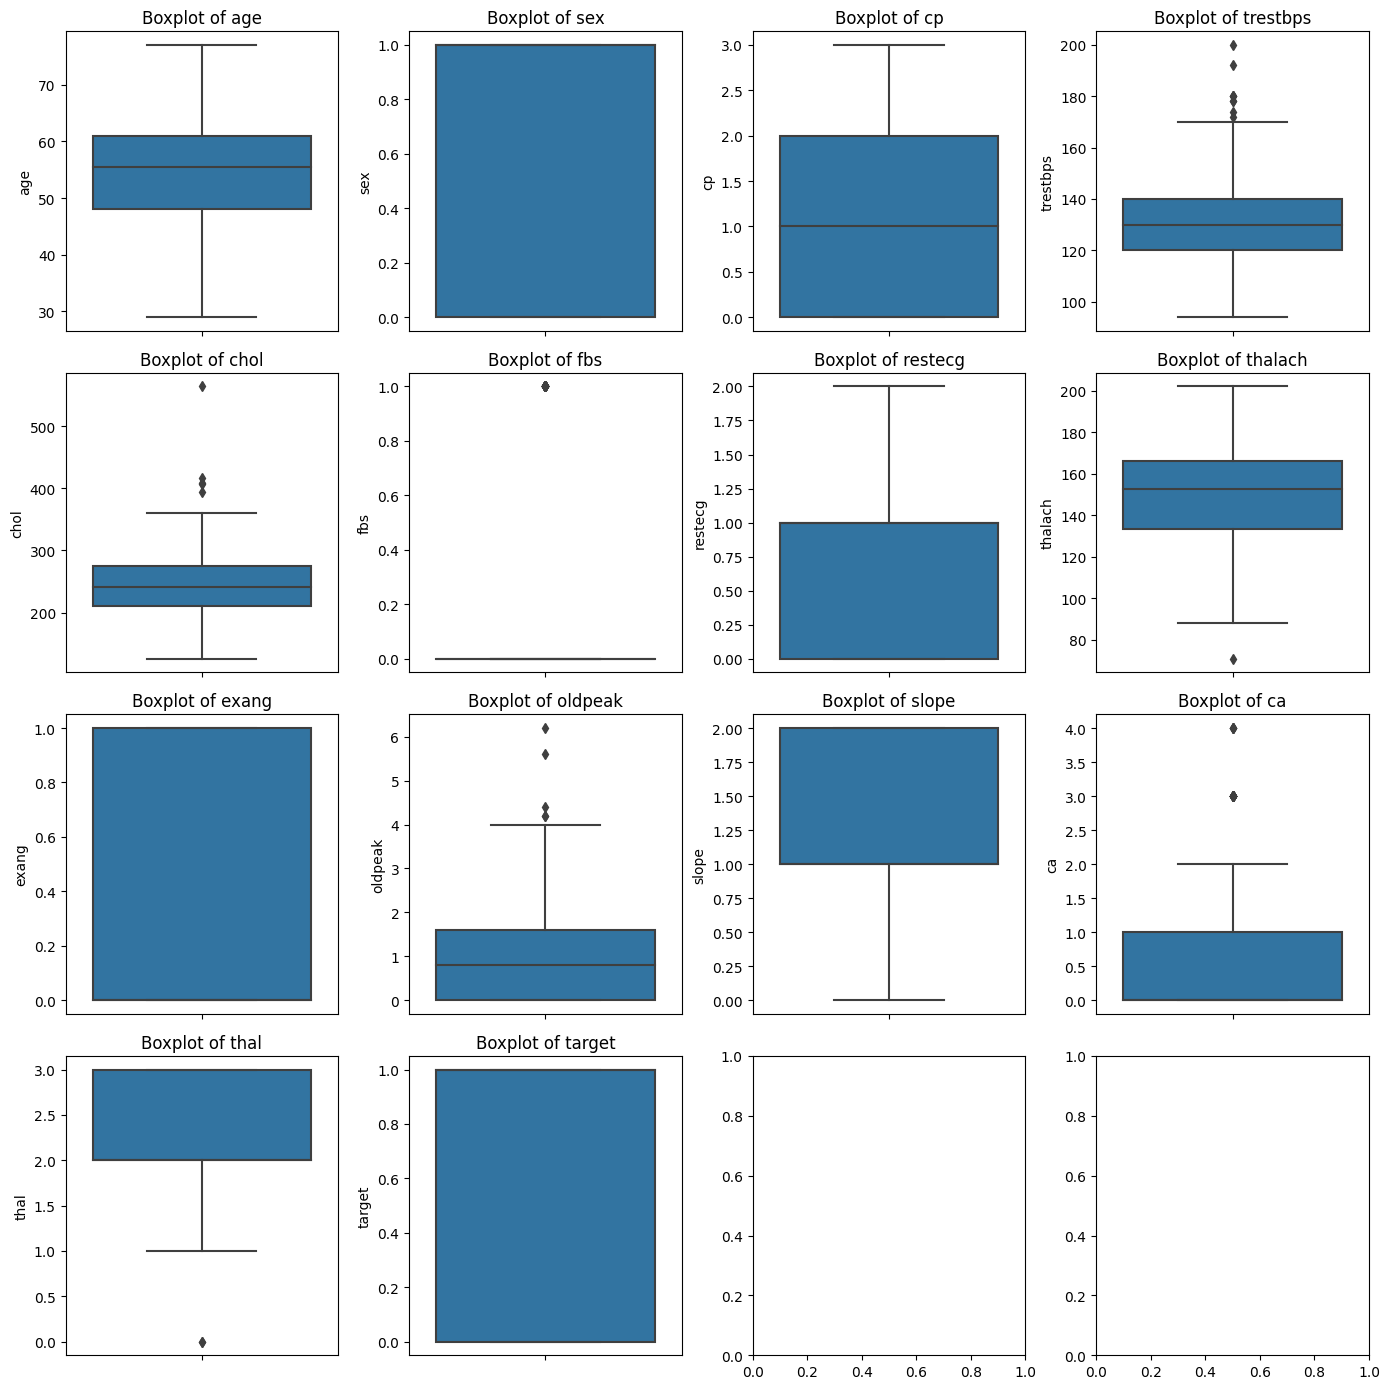

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(14,14))

for i, column in enumerate(df.columns):
    row = i // 4
    col = i % 4
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

## Removing outlier data
Not required for the model, but code here just for posterity

In [40]:
def remove_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

In [41]:
df_nonoutlier = remove_outliers(df)

In [42]:
df_nonoutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   chol      228 non-null    int64  
 5   fbs       228 non-null    int64  
 6   restecg   228 non-null    int64  
 7   thalach   228 non-null    int64  
 8   exang     228 non-null    int64  
 9   oldpeak   228 non-null    float64
 10  slope     228 non-null    int64  
 11  ca        228 non-null    int64  
 12  thal      228 non-null    int64  
 13  target    228 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.7 KB


## Simple tree based model

In [49]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

# Fit the model
xgb.fit(X_train, y_train)

# Predict on test set
y_pred = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R squared: {r2:.2f}')

Mean Squared Error: 0.15
R squared: 0.38


## Model explanation
Basis: Considers the contribution of each feature to every individual prediction.

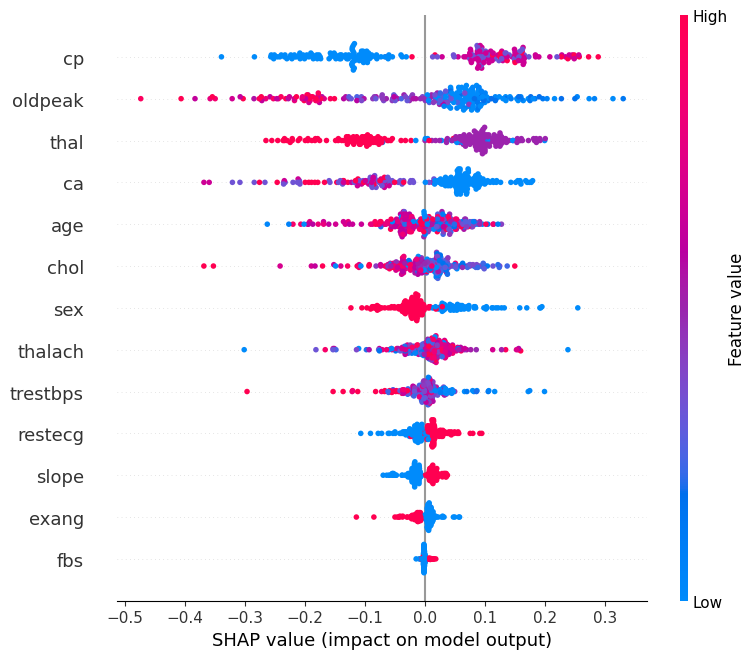

In [50]:
import shap

explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_train)

#### Feature importances
Measures how often a feature is used in splits and how much those splits improve the model.

In [52]:
# Get feature importances
importances = xgb.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
2         cp    0.235303
12      thal    0.172933
11        ca    0.142781
9    oldpeak    0.116032
1        sex    0.080317
10     slope    0.056495
6    restecg    0.042855
3   trestbps    0.036413
8      exang    0.031445
0        age    0.030170
7    thalach    0.030045
4       chol    0.023968
5        fbs    0.001242
